In [86]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from functions import *

In [87]:
today = datetime.today().strftime('%Y-%m-%d')

## Plan

- Collect stock data for SPY, and different stocks based on market cap (small, medium, large)
- Cleean data
- EDA
- For each stock:
    - Feature engineering
        - Create features
        - Create target
        - Reduce dimensionality
            - XGBoost
            - Rabdom Forest
            - Hierarchical clusering
    - Split data
    - Create pipelines for models: Linear Regression (baseline), SARIMAX, XGBoost, Random Forest, Recurrent Neural Network
        - Grid search for hyperparameters
        - Train model
        - Evaluate model 
    - Compare models
- The model that is chosen the most based on market cap is the best model for that market cap
- Test models on unseen data (if there will be enough time)

## Collect data

In [88]:
# Ticker object

# SPY
SPY_ticker = yf.Ticker('SPY')

# Large cap and above
AAPL_ticker = yf.Ticker('AAPL')
PLTR_ticker = yf.Ticker('PLTR')
UBER_ticker = yf.Ticker('UBER')
META_ticker = yf.Ticker('META')
JPM_ticker = yf.Ticker('JPM')

# Mid cap
CVI_ticker = yf.Ticker('CVI')
CUBE_ticker = yf.Ticker('CUBE')
DRS_ticker =  yf.Ticker('DRS')
PARAA_ticker = yf.Ticker('PARAA')
TRIP_ticker = yf.Ticker('TRIP')

# Small cap
TARS_ticker = yf.Ticker('TARS')
STC_ticker = yf.Ticker('STC')
SJW_ticker = yf.Ticker('SJW')
REVG_ticker =  yf.Ticker('REVG')
DAN_ticker = yf.Ticker('DAN')

In [89]:
# Historical prices
SPY = SPY_ticker.history(period = "5y")

AAPL = AAPL_ticker.history(period = "5y")
PLTR = PLTR_ticker.history(period = "5y")
UBER = UBER_ticker.history(period = "5y")
META = META_ticker.history(period = "5y")
JPM = JPM_ticker.history(period = "5y")

# Mid cap
CVI = CVI_ticker.history(period = "5y")
CUBE = CUBE_ticker.history(period = "5y")
DRS = DRS_ticker.history(period = "5y")
PARAA = PARAA_ticker.history(period = "5y")
TRIP = TRIP_ticker.history(period = "5y")

# Small cap
TARS = TARS_ticker.history(period = "5y")
STC = STC_ticker.history(period = "5y")
SJW =  SJW_ticker.history(period = "5y")
REVG = REVG_ticker.history(period = "5y")
DAN = DAN_ticker.history(period = "5y")

In [90]:
stocks = [SPY, AAPL, PLTR, UBER, META, JPM, CVI, CUBE, DRS, PARAA, TRIP, TARS, STC, SJW, REVG, DAN]

for stock in stocks:
    generate_columns(stock)

<Axes: xlabel='Date', ylabel='Cum_Return'>

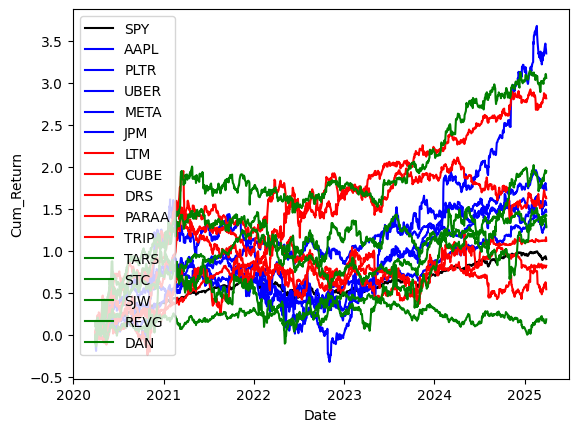

In [92]:
sns.lineplot(data = SPY['Cum_Return'], label = 'SPY', color = 'black')

sns.lineplot(data = AAPL['Cum_Return'], label = 'AAPL', color = 'blue')
sns.lineplot(data = PLTR['Cum_Return'], label = 'PLTR', color = 'blue')
sns.lineplot(data = UBER['Cum_Return'], label = 'UBER', color = 'blue')
sns.lineplot(data = META['Cum_Return'], label = 'META', color = 'blue')
sns.lineplot(data = JPM['Cum_Return'], label = 'JPM', color = 'blue')

sns.lineplot(data = CVI['Cum_Return'], label = 'LTM', color = 'red')
sns.lineplot(data = CUBE['Cum_Return'], label = 'CUBE', color = 'red')
sns.lineplot(data = DRS['Cum_Return'], label = 'DRS', color = 'red')
sns.lineplot(data = PARAA['Cum_Return'], label = 'PARAA', color = 'red')
sns.lineplot(data = TRIP['Cum_Return'], label = 'TRIP', color = 'red')

sns.lineplot(data = TARS['Cum_Return'], label = 'TARS', color = 'green')
sns.lineplot(data = STC['Cum_Return'], label = 'STC', color = 'green')
sns.lineplot(data = SJW['Cum_Return'], label = 'SJW', color = 'green')
sns.lineplot(data = REVG['Cum_Return'], label = 'REVG', color = 'green')
sns.lineplot(data = DAN['Cum_Return'], label = 'DAN', color = 'green')